In [2]:
import tensorflow as tf
tf.__version__

'2.14.0-dev20230730'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
filename=["dcnn-A100","dcnn-t4","dcnn-v100","dcnn-rtx3050"]

In [5]:
import pickle
vars2=[]
def load_variables(filename=[],vars2=[]):
    for i in range(len(filename)):
        with open(f'time_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(filename,vars2)

In [6]:
vars2

[209.22806525230408, 314.5571882724762, 325.60185384750366, 193.44189620018005]

In [7]:
filename2=["Nividia A100","Nividia T4","Nividia v100","Nividia RTX-3050"]

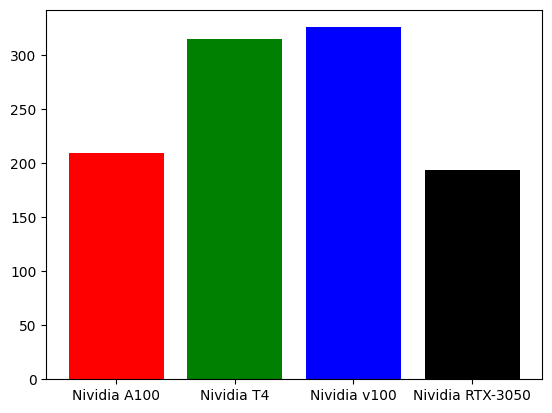

In [9]:
plt.bar(filename2,height=vars2, color=["r","g","b","black"])
plt.savefig("plot_model/GPU_Comparision")